### LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pal = ["#e63946", "#1d3557", "#457b9d", "#a8dadc", "#f1faee"] #collor pallete untuk visual
sns.set_palette(pal, 5, 0.8)
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler #untuk normalisasi
from sklearn.feature_selection import SelectKBest, chi2 #untuk feature selection
from sklearn import preprocessing #untuk processing data
from sklearn import model_selection #splitting data dan kfold
from sklearn.tree import DecisionTreeClassifier # Algoritma DecisionTree Classifier
from sklearn.svm import SVC #Algoritma SVM Classifier
from sklearn.model_selection import GridSearchCV #untuk hypetuning
from sklearn.metrics import confusion_matrix, classification_report # untuk melihat data positive true dan negative true serta akurasinya
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score #untuk evaluasi

from imblearn.over_sampling import SMOTE, RandomOverSampler #balancing data
from imblearn.pipeline import Pipeline 

import warnings #membuang warning yang mucul pada output
warnings.filterwarnings('ignore')


### INSERT DATASET

Import data train dan test yang sudah ada ke DataFrame

In [4]:
df = pd.read_csv('/content/sample_data/train.csv')

In [ ]:
dt_test = pd.read_csv('test.csv')

### DESCRIBE DATA

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.describe(include="all") # melihat statistik data secara keseluruhan dari numerik dan kotegori

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


In [ ]:
df.nunique()
#cek uniq pada setiap feature

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

In [ ]:
df.shape

(4250, 20)

### MISSING VALUE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Tidak ada Missing value pada data train

In [ ]:
kategori = ['state','area_code','international_plan','voice_mail_plan', 'churn']
numerik = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge', 
            'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
            'total_night_charge', 'total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']
#bagi kategori dan numerik column untuk cleaning dll

### DUPLICATE DATA

In [ ]:
df.duplicated().sum()

0

Tidak ada Duplikasi row pada data train

### VISUALISASI

In [ ]:
print("Mean account_length :",(df['account_length'].mean()))
print("Median account_length :",(df['account_length'].median()))
print("Modus account_length :",(df['account_length'].mode()[0]))

Mean account_length : 100.23623529411765
Median account_length : 100.0
Modus account_length : 90


Text(0.5, 0, 'account_length(Month)')

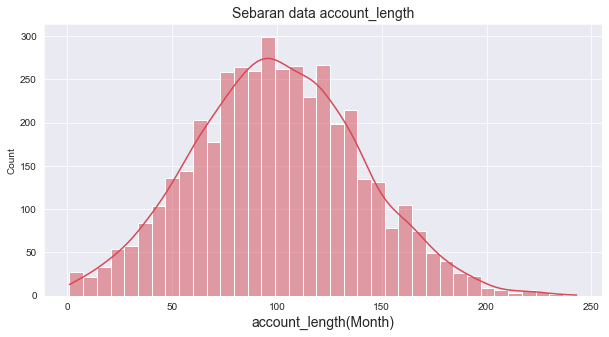

In [ ]:
plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x="account_length", kde=True)
plt.title("Sebaran data account_length", fontsize=14)
plt.xlabel("account_length(Month)", fontsize=14)
#Melihat sebaran data user berdasarkan lama langganan telco provider 

Berdasarkan visualisasi diatas dan statistik account_length, menunjukan kemiringan(skew) ke kiri karena mean > median > modus

Text(0.5, 1.0, 'Sebaran data Churn')

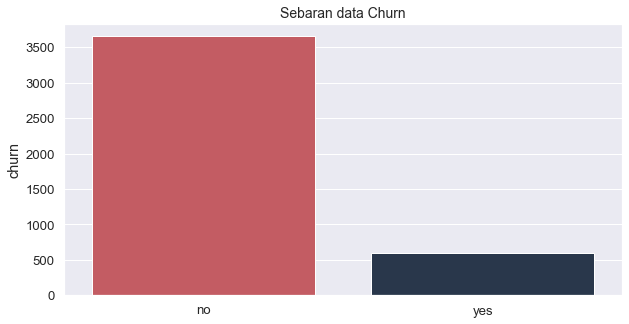

In [ ]:
plt.subplots(figsize=(10, 5))
sns.barplot(x=df.churn.value_counts().index, y=df.churn.value_counts())
plt.title("Sebaran data Churn", fontsize=14)
#visualisasi target

perbandingan value churn menunjukan data tidak balance

Text(0.5, 0, 'account_length(Month)')

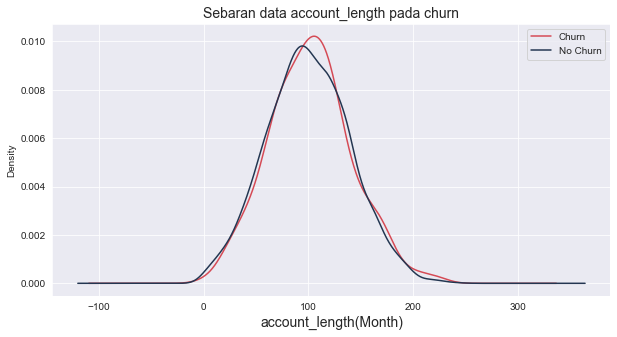

In [ ]:
plt.figure(figsize=(10,5))
for x in ['yes', 'no']:
    df.account_length[df.churn == x].plot(kind='kde')
plt.legend(("Churn","No Churn"))
plt.title("Sebaran data account_length pada churn", fontsize=14)
plt.xlabel("account_length(Month)", fontsize=14)

terjadi churn paling banyak pada user dengan lama 100, tetapi semakin lama juga tidak terjadi churn lagi 

In [ ]:
df['number_customer_service_calls'].value_counts()

1    1524
2     947
0     886
3     558
4     209
5      81
6      28
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

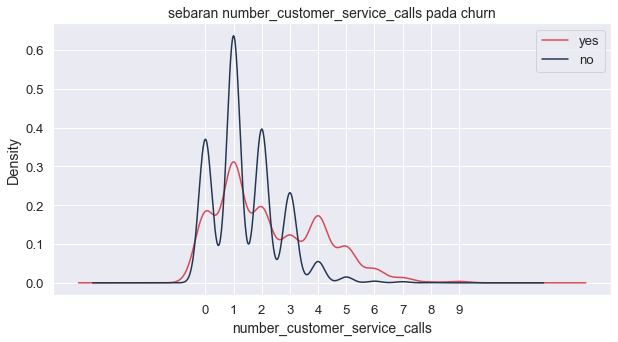

In [ ]:
plt.figure(figsize=(10,5))
for x in ['yes', 'no']:
    df.number_customer_service_calls[df.churn == x].plot.kde(bw_method=0.2)
    plt.xticks(np.arange(0, 10, 1.0))
    plt.legend(['yes', 'no'])
    plt.xlabel("number_customer_service_calls", fontsize=14)
    plt.title("sebaran number_customer_service_calls pada churn", fontsize=14)

Semakin sedikit menelpon CS kemungkinan untuk tidak terjadi churn, 

Semakin sering menelpon CS kemungkinan terjadi churn

Text(0.5, 0, 'customer call cs')

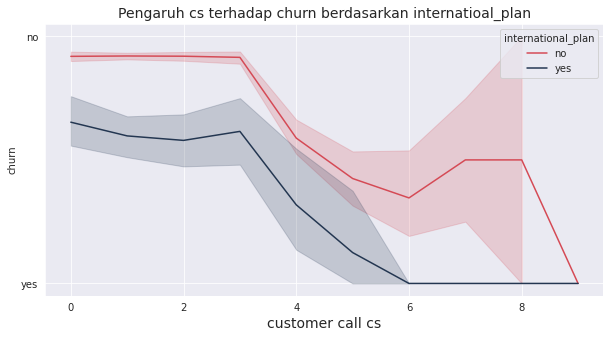

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="number_customer_service_calls", y="churn", hue="international_plan")
plt.title("Pengaruh cs terhadap churn berdasarkan internatioal_plan", fontsize=14)
plt.xlabel("customer call cs", fontsize=14)

baik user yang punya international_plan dan tidak semakin sering menelpon  CS semakin kemungkinan terjadi churn terutama yang ada International_plan

Text(0.5, 0, 'customer call cs')

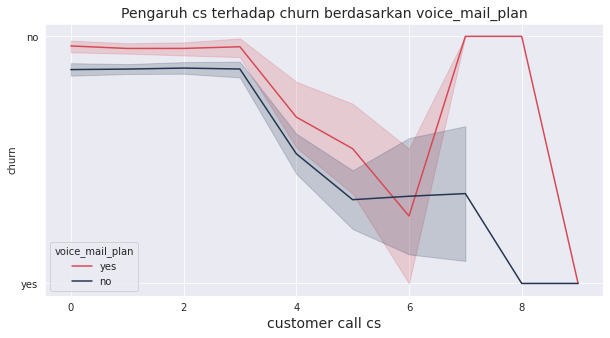

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="number_customer_service_calls", y="churn", hue="voice_mail_plan")
plt.title("Pengaruh cs terhadap churn berdasarkan voice_mail_plan", fontsize=14)
plt.xlabel("customer call cs", fontsize=14)

semakin menelpon CS tidak terlalu mempengaruhi user yan punya voice_mail_plan tetapi 

sangat berpengaruh pada yang tidak punya voice_mail_plan 

Text(0.5, 1.0, 'Sebaran data Day Call')

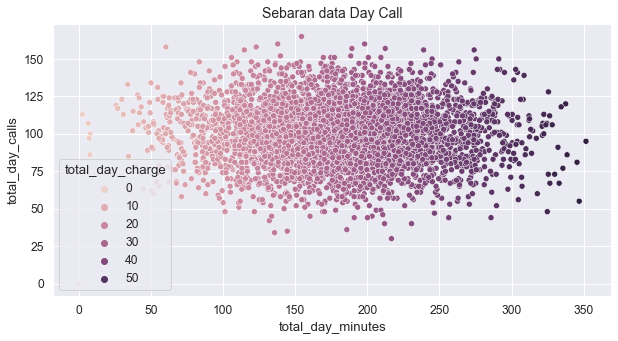

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.1)
sns.scatterplot(data=df, x="total_day_minutes", y="total_day_calls", hue="total_day_charge")
plt.title("Sebaran data Day Call", fontsize=14)

Text(0.5, 1.0, 'Sebaran data Night Call')

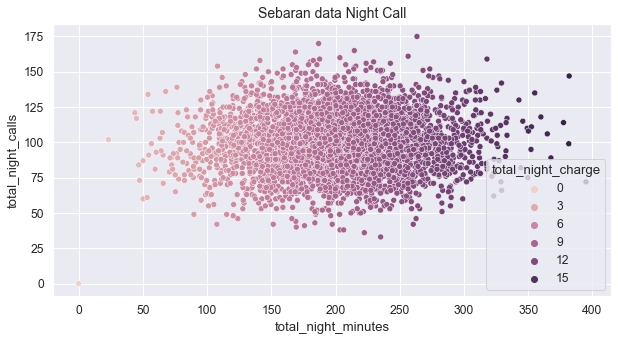

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.1)
sns.scatterplot(data=df, x="total_night_minutes", y="total_night_calls", hue="total_night_charge")
plt.title("Sebaran data Night Call", fontsize=14)

Text(0.5, 1.0, 'Sebaran data Evening Call')

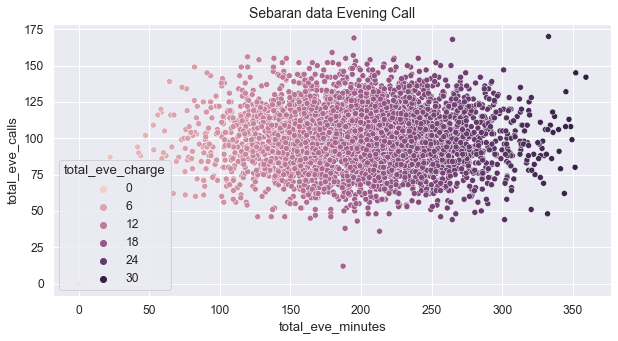

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.1)
sns.scatterplot(data=df, x="total_eve_minutes", y="total_eve_calls", hue="total_eve_charge")
plt.title("Sebaran data Evening Call", fontsize=14)

Text(0.5, 1.0, 'Sebaran data International Call ')

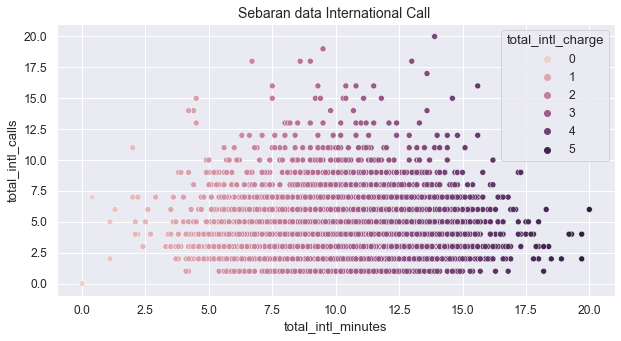

In [ ]:
plt.figure(figsize=(10,5))
sns.set(font_scale = 1.1)
sns.scatterplot(data=df, x="total_intl_minutes", y="total_intl_calls", hue="total_intl_charge")
plt.title("Sebaran data International Call ", fontsize=14)

Sebaran data call secara menyeluruh sama

semakin lama call semakin besar charge yang diterima

sementara semakin banyak melakukan call tidak mempengaruhi besar charge secara signifikan

### OUTLIER

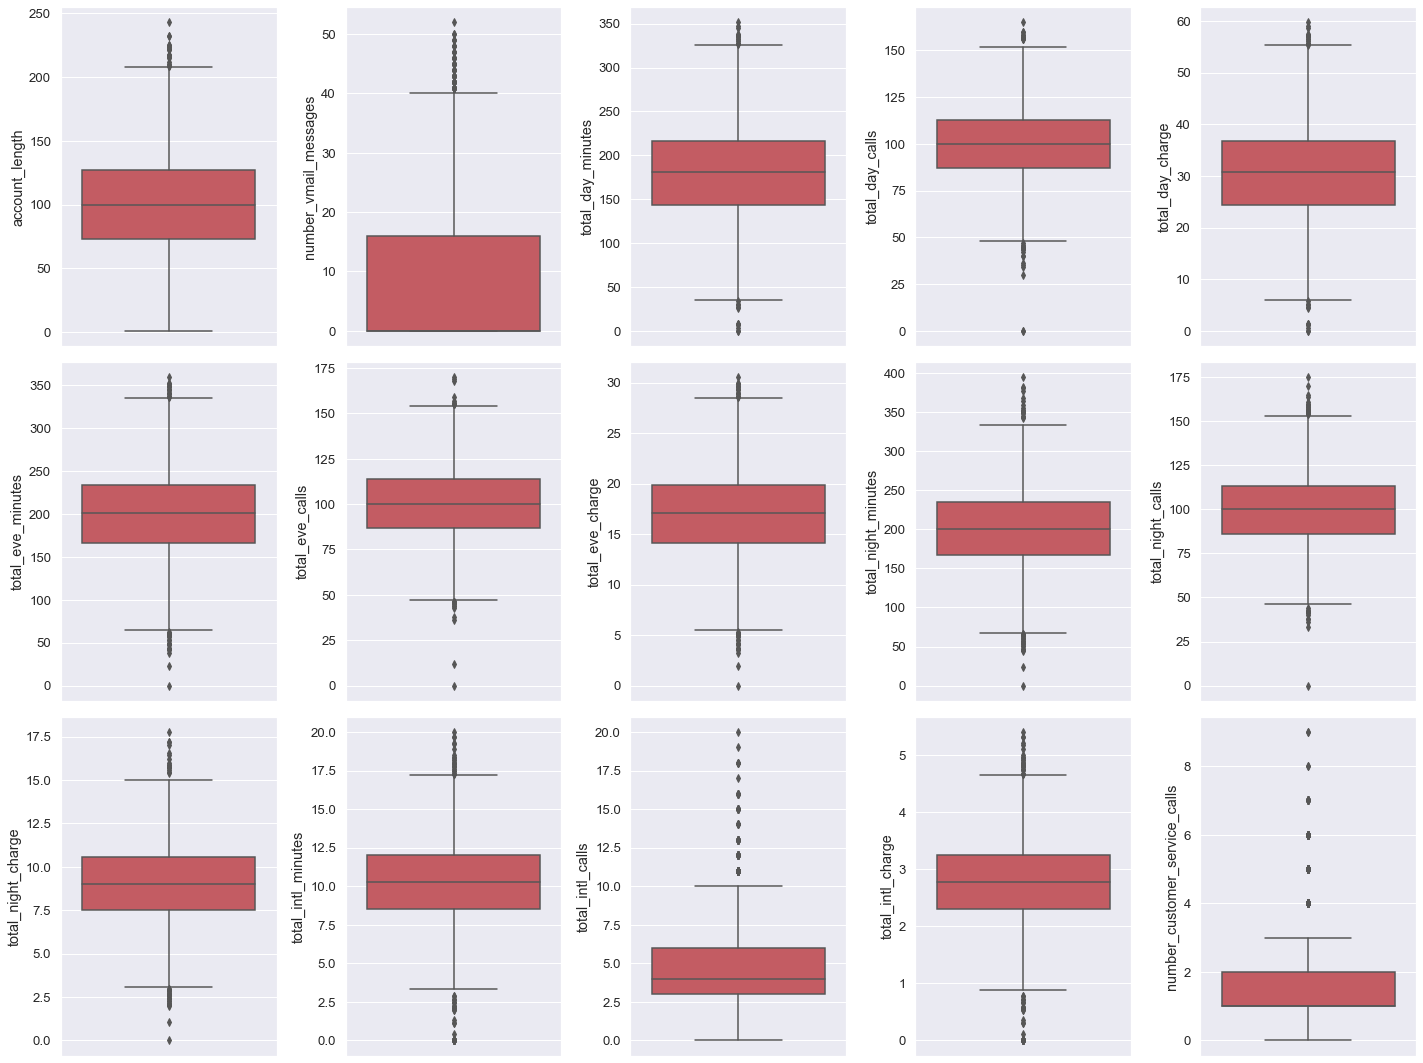

In [ ]:
plt.figure(figsize=(20,15))
n=1
for col in numerik:
    plt.subplot(3,5,n)
    n+=1
    sns.boxplot(y=df[col])
    plt.tight_layout()

Cek Outlier dengan Boxplot dari setiap numerik feature

In [ ]:
outliers = [] #untuk liat outliernya, yg outlier disimpen disini
fill = np.array([True]*len(df)) #untuk filtering dataframe train yg outlier dengan bool
#cari nilai interquartile
for col in numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    outliers = df[(df[col] < low_limit) | (df[col] > high_limit)]
    fill = ((df[col] >= low_limit) & (df[col] <= high_limit)) & fill

In [ ]:
df['total_day_minutes'].quantile(0.75) + ((df['total_day_minutes'].quantile(0.75)-df['total_day_minutes'].quantile(0.25)) * 1.5)

325.51249999999993

In [ ]:
outliers.head()#data outlier

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
12,NY,161,area_code_415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,yes
17,CO,77,area_code_408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,yes
56,TX,150,area_code_510,no,no,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,4,yes
64,NY,144,area_code_408,no,no,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,yes


pada index 2 /row 3 total_day_minutes nya adalah outlier

In [ ]:
outliers['churn'].value_counts() #cek outlier target, yg mungkin berdampak saat didrop

yes    170
no     165
Name: churn, dtype: int64

In [ ]:
df2 = df[fill]#filtering outlier

In [ ]:
print(df.shape)
print(df2.shape)
#perbedaan jumlah row setelah outlier

(4250, 20)
(3515, 20)


In [ ]:
print("Data yang dibuang : %.2f%%" % ((df2.shape[0]-df.shape[0])/df.shape[0]*100))

Data yang dibuang : -17.29%


Text(0.5, 1.0, 'Target Setelah Drop Outlier')

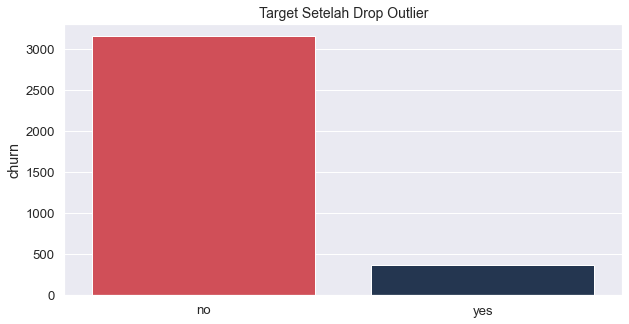

In [ ]:
plt.subplots(figsize=(10, 5))
sns.set(font_scale=1.2)
sns.barplot(x=df2.churn.value_counts().index, y=df2.churn.value_counts(), palette=pal)
plt.title("Target Setelah Drop Outlier", fontsize=14)
#visualisasi target seletah membuang outlier

### BINNING DATA

In [ ]:
print("user terlama :", df2['account_length'].max())
print("user terbaru :", df2['account_length'].min())

user terlama : 204
user terbaru : 1


In [ ]:
df2['account_length'].value_counts()

90     49
87     45
93     43
127    42
120    41
       ..
191     1
204     1
188     1
199     1
202     1
Name: account_length, Length: 201, dtype: int64

In [ ]:
lvl = np.linspace(min(df2['account_length']), max(df2['account_length']), 6)
lvl_acc = ['level 1', 'level 2', 'level 3', 'level 4', 'level 5']
df2['level_account'] = pd.cut(df2['account_length'], lvl, labels=lvl_acc, include_lowest=True)
#membagi account_length menjadi 5 kategori level dengan 6 pembatas

In [ ]:
df2.drop('account_length', axis=1, inplace=True)
#drop accountlength setelah dikategorisasi

In [ ]:
df2.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,level_account
0,OH,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,level 3
1,NJ,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,level 4
3,OK,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,level 2
5,MO,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no,level 4
7,WV,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no,level 4


Text(0.5, 1.0, 'Sebaran data level_account')

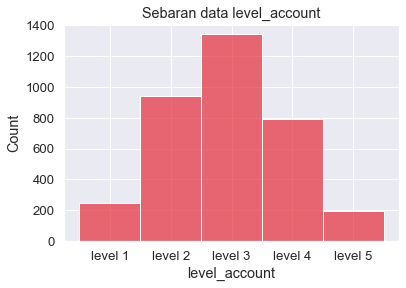

In [ ]:
sns.histplot(x=df2.level_account, color=pal[0])
plt.title("Sebaran data level_account")

### FEATURE ENGINE

In [ ]:
Tot_min = (df2['total_day_minutes'] + df2['total_eve_minutes'] + df2['total_night_minutes'] + df2['total_intl_minutes'])
Tot_call = (df2['total_day_calls'] + df2['total_eve_calls'] + df2['total_night_calls'] + df2['total_intl_calls'])
Tot_charge = (df2['total_day_charge'] + df2['total_eve_charge'] + df2['total_night_charge'] + df2['total_intl_charge'])
#feature baru dari total minute call dan charge pada setiap waktunya


In [ ]:
avg_call_charge = Tot_charge/Tot_call
avg_call_min = Tot_min/Tot_call
#feature dari rata2 setiap charge dan minute dari total telpon

In [ ]:
Tot_min_tes = (dt_test['total_day_minutes'] + dt_test['total_eve_minutes'] + dt_test['total_night_minutes'] + dt_test['total_intl_minutes'])
Tot_call_tes = (dt_test['total_day_calls'] + dt_test['total_eve_calls'] + dt_test['total_night_calls'] + dt_test['total_intl_calls'])
Tot_charge_tes = (dt_test['total_day_charge'] + dt_test['total_eve_charge'] + dt_test['total_night_charge'] + dt_test['total_intl_charge'])
avg_call_charge_tes = Tot_charge_tes/Tot_call_tes
avg_call_min_tes = Tot_min_tes/Tot_call_tes
#feature untuk dt_test

In [ ]:
df2['Total_minute'] = Tot_min
df2['Total_call'] = Tot_call
df2['Total_charge'] = Tot_charge
df2['avg_call_charge'] = avg_call_charge
df2['avg_call_minute'] = avg_call_min
df2.drop(labels=['total_day_minutes','total_day_calls','total_day_charge', 
            'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
            'total_night_charge', 'total_intl_minutes','total_intl_calls','total_intl_charge'],axis=1, inplace=True)
df2.head()
#simpan ke dataframe dan drop total pada tiap waktu

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,level_account,Total_minute,Total_call,Total_charge,avg_call_charge,avg_call_minute
0,OH,area_code_415,no,yes,26,1,no,level 3,625.2,332,59.24,0.178434,1.883133
1,NJ,area_code_415,no,no,0,0,no,level 4,539.4,333,62.29,0.187057,1.619820
3,OK,area_code_415,yes,no,0,3,no,level 2,512.0,359,52.09,0.145097,1.426184
5,MO,area_code_415,yes,no,0,0,no,level 4,479.0,275,46.90,0.170545,1.741818
7,WV,area_code_415,yes,yes,37,0,no,level 4,818.2,297,80.54,0.271178,2.754882


In [ ]:
dt_test['Total_minute'] = Tot_min_tes
dt_test['Total_call'] = Tot_call_tes
dt_test['Total_charge'] = Tot_charge_tes
dt_test['avg_call_charge'] = avg_call_charge_tes
dt_test['avg_call_minute'] = avg_call_min_tes
dt_test.drop(labels=['id','total_day_minutes','total_day_calls','total_day_charge', 
            'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
            'total_night_charge', 'total_intl_minutes','total_intl_calls','total_intl_charge'],axis=1, inplace=True)
#drop feature di dt_test

### NORMALISASI

In [ ]:
df3 = df2.copy()

In [ ]:
kategori = ['state','area_code','international_plan','voice_mail_plan', 'churn', 'level_account']
numerik = ['number_vmail_messages','number_customer_service_calls',
            'Total_minute','Total_call','Total_charge', 'avg_call_minute', 'avg_call_charge']
#bagi kategori dan numerik column untuk cleaning dll

In [ ]:
for col in numerik:
   df3[col] = MinMaxScaler().fit_transform(df2[col].values.reshape(len(df2), 1)) #normalisasi data numerik pada train
   dt_test[col] = MinMaxScaler().fit_transform(dt_test[col].values.reshape(len(dt_test), 1)) #normalisasi data numerik pada test

Scalling setiap niali numerik dengan normalisasi untuk mengurangi bias dari range angka pada classifier

In [ ]:
df3.describe()

,number_vmail_messages,number_customer_service_calls,Total_minute,Total_call,Total_charge,avg_call_charge,avg_call_minute
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,0.173492,0.434519,0.514090,0.518319,0.516806,0.374938,0.400457
std,0.313365,0.325224,0.143626,0.155066,0.160466,0.121048,0.125020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.418465,0.412844,0.405392,0.293170,0.314648
50%,0.000000,0.333333,0.513631,0.518349,0.518028,0.364663,0.391530
75%,0.000000,0.666667,0.609466,0.623853,0.622208,0.449836,0.477054
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### FERATURE ENCODING

In [ ]:
df3.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,level_account,Total_minute,Total_call,Total_charge,avg_call_charge,avg_call_minute
0,OH,area_code_415,no,yes,0.650,0.333333,no,level 3,0.570162,0.646789,0.513082,0.316646,0.370441
1,NJ,area_code_415,no,no,0.000,0.000000,no,level 4,0.426660,0.651376,0.561742,0.342125,0.280502
3,OK,area_code_415,yes,no,0.000,1.000000,no,level 2,0.380833,0.770642,0.399011,0.218151,0.214363
5,MO,area_code_415,yes,no,0.000,0.000000,no,level 4,0.325640,0.385321,0.316209,0.293340,0.322173
7,WV,area_code_415,yes,yes,0.925,0.000000,no,level 4,0.892959,0.486239,0.852904,0.590670,0.668201


In [ ]:
#label encoder
df4 = df3.copy()
lbl_encoder = preprocessing.LabelEncoder()
for cat in kategori:
    df4[cat] = lbl_encoder.fit_transform(df4[cat])
df4.head()
#transforming pada data bentuk kategorik agar bisa dolah dengan algoritma

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,level_account,Total_minute,Total_call,Total_charge,avg_call_charge,avg_call_minute
0,35,1,0,1,0.650,0.333333,0,2,0.570162,0.646789,0.513082,0.316646,0.370441
1,31,1,0,0,0.000,0.000000,0,3,0.426660,0.651376,0.561742,0.342125,0.280502
3,36,1,1,0,0.000,1.000000,0,1,0.380833,0.770642,0.399011,0.218151,0.214363
5,24,1,1,0,0.000,0.000000,0,3,0.325640,0.385321,0.316209,0.293340,0.322173
7,49,1,1,1,0.925,0.000000,0,3,0.892959,0.486239,0.852904,0.590670,0.668201


In [ ]:

dt_test['state'] = lbl_encoder.fit_transform(dt_test['state'])
dt_test['area_code'] = lbl_encoder.fit_transform(dt_test['area_code'])
dt_test['international_plan'] = lbl_encoder.fit_transform(dt_test['international_plan'])
dt_test['voice_mail_plan'] = lbl_encoder.fit_transform(dt_test['voice_mail_plan'])
#transforming pada data test

### CORELATION

In [ ]:
df4.corr().iloc[6].sort_values(ascending=False)
#nilai korelasi palingtinggi dengan target

churn                            1.000000
Total_charge                     0.345670
Total_minute                     0.300893
avg_call_charge                  0.293355
international_plan               0.279414
avg_call_minute                  0.245193
state                            0.012978
area_code                        0.005712
level_account                    0.002612
number_customer_service_calls   -0.004485
Total_call                      -0.014945
number_vmail_messages           -0.105567
voice_mail_plan                 -0.115205
Name: churn, dtype: float64

In [ ]:
df4["international_plan"].value_counts()

0    3195
1     320
Name: international_plan, dtype: int64

Text(0.5, 1.0, 'Korelasi setiap feature')

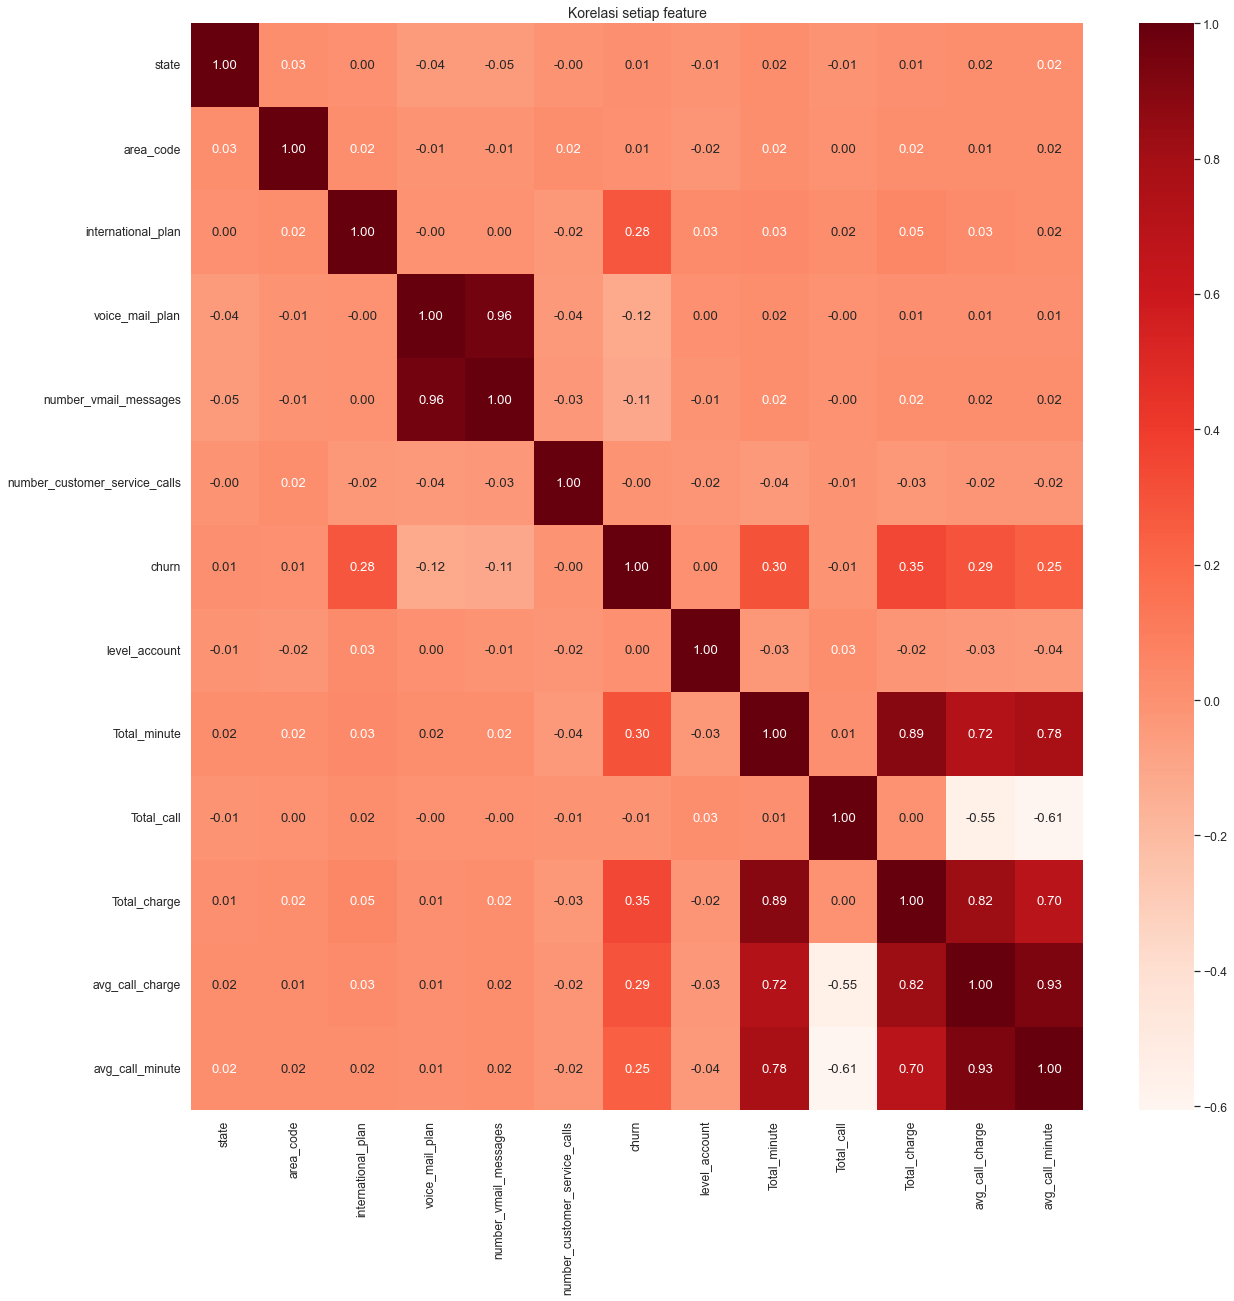

In [ ]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.1)
sns.heatmap(df4.corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title("Korelasi setiap feature", fontsize=14)

hanya 4 feature yang berkorelasi cukup/ >2,5

### FEATURE SELECTION

#### Manual Berdasarkan Korelasi

In [ ]:
#jika manual select, berdasarkan korelasi yg kuat
features_selec = ['Total_charge','Total_minute','avg_call_charge','international_plan']
Y = df4['churn']
X_manual = df4[features_selec]

### BALANCING

In [ ]:
Y.value_counts()

0    3147
1     368
Name: churn, dtype: int64

In [ ]:
test_sz = 0.2 #test train berbanding 80:20
seed = 100 #randomstate

In [ ]:
over = SMOTE(sampling_strategy=0.3, random_state=seed) #smote untuk sampling yg over
under = RandomOverSampler(sampling_strategy=0.5, random_state=seed) #RandomOversampleruntuk data under
stp = [('o', over),('u', under)] 
pipe = Pipeline(steps=stp)  #satuin functionnya dengan pipeline

In [ ]:
X_manual_res, Y_res = pipe.fit_resample(X_manual, Y) #fiting sample dengan pipeline yg sudah digabungkan smote dan randomoversample

In [ ]:
Y_res.value_counts() #nilai 1 jadi lebih baik dari sebelumnya

0    3147
1    1573
Name: churn, dtype: int64

### SPLIT Train,Test data

In [ ]:
X_manual.head()

,Total_charge,Total_minute,avg_call_charge,international_plan
0,0.513082,0.570162,0.316646,0
1,0.561742,0.426660,0.342125,0
3,0.399011,0.380833,0.218151,1
5,0.316209,0.325640,0.293340,1
7,0.852904,0.892959,0.590670,1


In [ ]:
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_sz, random_state=seed) #use all of feature
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_select, Y, test_size=test_sz, random_state=seed) #pake kbeast
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_manual_res, Y_res, test_size=test_sz, random_state=seed) #manual base on corelation

### MODELING

Mencoba Modeling dengan DecisionTreeClassifier dan Support Vector Machine Classifier

#### 1 DecisionTree

In [ ]:
deci = DecisionTreeClassifier(random_state=seed)
deci.fit(X_train, Y_train)
y_pred = deci.predict(X_test)
#penerapan algoritma DecisionteeClassifier pada  data train serta melakukan predict pada data test 

In [ ]:
print(X_test.shape)
print(y_pred.shape)

(944, 4)
(944,)


#### 2 SVM Classifier

In [ ]:
svc = SVC(random_state=seed)
svc.fit(X_train, Y_train)
y_pred2 = svc.predict(X_test)
#penerapan algoritma SVM Classicfier pada  data train serta melakukan predict pada data test 

## K-Fold

#### 1 DecisionTree

In [ ]:
kf = model_selection.KFold(n_splits=20, shuffle=True, random_state=seed)
results = model_selection.cross_val_score(deci, X_manual_res, Y_res, cv=kf, scoring='accuracy')
print("Accuracy: %.3f%%(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
#k-folding untuk kepercayaan kualitas dari akurasi pada model

Accuracy: 91.483%(1.398%)


Berdasarkan hasil validasi K-fold bahwa akurasi model sangat baik dan dapat melakukan prediksi dengan baik pada terget. Dan dari hasil ini model tidak overfitting pada data sehingga bisa dipakai untuk predik data input yang sama

In [ ]:
print("Accuracy: %.3f%%" % (accuracy_score(Y_test, y_pred)*100))
print("Recall: %.3f%%" % (recall_score(Y_test, y_pred)*100))
print("Precission: %.3f%%" % (precision_score(Y_test, y_pred)*100))
print("F1-Score: %.3f%%" % (f1_score(Y_test, y_pred)*100))
print("ROC-AUC: %.3f%%" % (roc_auc_score(Y_test, y_pred)*100))

Accuracy: 90.678%
Recall: 90.064%
Precission: 83.136%
F1-Score: 86.462%
ROC-AUC: 90.523%


In [ ]:
print(classification_report(Y_test, y_pred))#nilai akurasi dll menggunakan classificationreport

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       632
           1       0.83      0.90      0.86       312

    accuracy                           0.91       944
   macro avg       0.89      0.91      0.90       944
weighted avg       0.91      0.91      0.91       944



Text(28.5, 0.5, 'actual')

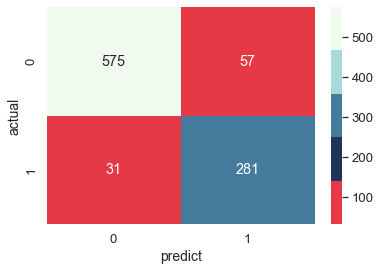

In [ ]:
cf = confusion_matrix(Y_test, y_pred)
sns.set(font_scale=1.2)
sns.heatmap(cf,annot=True,cmap=pal, fmt=".0f")
plt.xlabel("predict", fontsize=14)
plt.ylabel("actual", fontsize=14)

Recall & Precision optimal tetapi ada kemungkinan prediksi mengalami error I atau sebenarnya (tidak terjadi churn customer) tetapi pada prediksi hasilnya (terjadi churn customer)
walau akurasinya pada data true tinggi

#### 2 SVM Classifier

In [ ]:
kf = model_selection.KFold(n_splits=20, shuffle=True, random_state=seed)
results2 = model_selection.cross_val_score(svc, X_manual_res, Y_res, cv=kf, scoring='accuracy')
print("Accuracy: %.3f%%(%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))
#k-folding untuk kepercayaan kualitas dari akurasi pada model

Accuracy: 86.843%(1.687%)


In [ ]:
print("Accuracy: %.3f%%" % (accuracy_score(Y_test, y_pred2)*100))
print("Recall: %.3f%%" % (recall_score(Y_test, y_pred2)*100))
print("Precission: %.3f%%" % (precision_score(Y_test, y_pred2)*100))
print("F1-Score: %.3f%%" % (f1_score(Y_test, y_pred2)*100))
print("ROC-AUC: %.3f%%" % (roc_auc_score(Y_test, y_pred2)*100))

Accuracy: 88.136%
Recall: 84.615%
Precission: 80.488%
F1-Score: 82.500%
ROC-AUC: 87.244%


In [ ]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       632
           1       0.80      0.85      0.83       312

    accuracy                           0.88       944
   macro avg       0.86      0.87      0.87       944
weighted avg       0.88      0.88      0.88       944



Text(28.5, 0.5, 'actual')

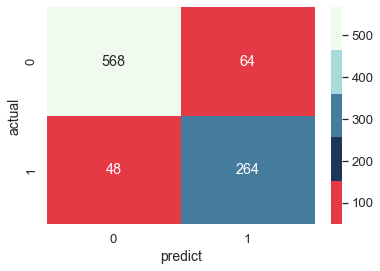

In [ ]:
cf = confusion_matrix(Y_test, y_pred2)
sns.set(font_scale=1.2)
sns.heatmap(cf,annot=True,cmap=pal, fmt=".0f")
plt.xlabel("predict", fontsize=14)
plt.ylabel("actual", fontsize=14)

Recall & Precision optimal tetapi ada kemungkinan prediksi mengalami error I atau sebenarnya (tidak terjadi churn customer) tetapi pada prediksi hasilnya (terjadi churn customer)
walau akurasinya pada data true tinggi

## Predict test.csv

#### 1 DecisionTree

In [ ]:
dt_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Total_minute,Total_call,Total_charge,avg_call_charge,avg_call_minute
0,16,128,1,0,1,0.490196,0.166667,0.765302,0.518519,0.750450,0.686763,0.556318
1,1,118,2,1,0,0.000000,0.000000,0.640103,0.624339,0.631224,0.534281,0.423090
2,12,62,1,0,0,0.000000,0.666667,0.619833,0.243386,0.506749,0.636976,0.633827
3,46,93,2,0,0,0.000000,0.500000,0.426272,0.761905,0.501950,0.380890,0.244003
4,29,174,1,0,0,0.000000,0.500000,0.666733,0.544974,0.519346,0.480883,0.478527


In [ ]:
dt_test.drop(['state','area_code','account_length','voice_mail_plan','number_vmail_messages','number_customer_service_calls', 'Total_call', 'avg_call_minute'],
            axis=1, inplace=True)
#drop setiap feature yang tidak dipakai

In [ ]:
dt_test.drop('chrun_predict', axis=1, inplace=True) #dirunning jika sebelumnya sudah running predict pada dt_test dan menyimpan hasil churn

In [ ]:
y_pred_datatest = deci.predict(dt_test) #prediksi dt_test

In [ ]:
dt_test_prediction = dt_test
dt_test_prediction["chrun_predict"] = y_pred_datatest 
np.array(dt_test_prediction["chrun_predict"].head(10))
#disini tujuannya untuk nyimpen hasil predik ke dataframe lain dan nampilin hasilnya

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
dt_test_prediction["chrun_predict"].value_counts() #hasil prediksi pada target di data test

0    625
1    125
Name: chrun_predict, dtype: int64

#### 2 SVM Classifier

In [ ]:
dt_test.drop('chrun_predict', axis=1, inplace=True) #dirunning jika sebelumnya sudah running predict pada dt_test dan menyimpan hasil churn

In [ ]:
y_pred_datatest2 = svc.predict(dt_test) #prediksi dt_test

In [ ]:
dt_test_prediction2 = dt_test
dt_test_prediction2["chrun_predict"] = y_pred_datatest2
np.array(dt_test_prediction2["chrun_predict"].head(10))
#disini tujuannya untuk nyimpen hasil predik ke dataframe lain dan nampilin hasilnya

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
dt_test_prediction2["chrun_predict"].value_counts() #hasil prediksi pada target di data test

0    529
1    221
Name: chrun_predict, dtype: int64

dari hasil keduanya diatas

Model Deci memprediksi data negative(terjadi chrun) lebih bnyak dari Model SVM dalam memprediksi data negative(terjadi churn),

Model SVM memprediksi data positive(tidak terjadi churn) lebih banyak dari Model Deci dalam memprediksi data positive(tidak terjadi churn)

## HypeTuning

#### 1 DecisionTree

In [ ]:
dept=np.arange(3,50,2)
dept

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49])

In [ ]:
params = {'max_depth':np.arange(3,50,2)}
#define paramater untuk decisiontree

In [ ]:
gridscv = GridSearchCV(estimator=deci,
                        param_grid=params,
                        n_jobs = 16,
                        cv = 20)
gridscv.fit(X_train, Y_train) #melakukan tunning pada model 

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=16,
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49])})

In [ ]:
gridscv.best_params_
#parameter terbaik untuk model deci adalah max_depth 5

{'max_depth': 25}

In [ ]:
y_predTuning = gridscv.predict(X_test)

In [ ]:
print("Accuracy after Tuning: %.3f%%" % (accuracy_score(Y_test, y_predTuning)*100))
print("Recall after Tuning: %.3f%%" % (recall_score(Y_test, y_predTuning)*100))
print("Precission after Tuning: %.3f%%" % (precision_score(Y_test, y_predTuning)*100))
print("F1-Score after Tuning: %.3f%%" % (f1_score(Y_test, y_predTuning)*100))
print("ROC-AUC after Tuning: %.3f%%" % (roc_auc_score(Y_test, y_predTuning)*100))

Accuracy after Tuning: 90.678%
Recall after Tuning: 90.064%
Precission after Tuning: 83.136%
F1-Score after Tuning: 86.462%
ROC-AUC after Tuning: 90.523%


### 2 SVM Classifier

In [ ]:
params2 = {'C':[0.1,1,10,100], 'gamma':[1, 0.1, 0.01,0.001]}
#define paramter untuk SVMC C dan gamma

In [ ]:
gridscv2 = GridSearchCV(estimator=svc,
                        param_grid=params2,
                        n_jobs = 16,
                        cv = 20)
gridscv2.fit(X_train, Y_train)

GridSearchCV(cv=20, estimator=SVC(random_state=100), n_jobs=16,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [ ]:
gridscv2.best_params_
#paramter terbaik untuk SVCM adalah C 100 dan gamma 0.01

{'C': 100, 'gamma': 1}

In [ ]:
y_predTuning2 = gridscv2.predict(X_test)

In [ ]:
print("Accuracy after Tuning: %.3f%%" % (accuracy_score(Y_test, y_predTuning2)*100))
print("Recall after Tuning: %.3f%%" % (recall_score(Y_test, y_predTuning2)*100))
print("Precission after Tuning: %.3f%%" % (precision_score(Y_test, y_predTuning2)*100))
print("F1-Score after Tuning: %.3f%%" % (f1_score(Y_test, y_predTuning2)*100))
print("ROC-AUC after Tuning: %.3f%%" % (roc_auc_score(Y_test, y_predTuning2)*100))

Accuracy after Tuning: 88.242%
Recall after Tuning: 84.615%
Precission after Tuning: 80.734%
F1-Score after Tuning: 82.629%
ROC-AUC after Tuning: 87.324%
